In [241]:
#set up google drive data mounting
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [242]:
pip install sklearn

In [243]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data_dir = '/content/drive/MyDrive/Homework'
os.listdir(data_dir)

In [245]:
data = pd.read_csv(os.path.join(data_dir,"merged.csv"))

In [246]:
X = data.iloc[1:, 2: 27]
y = data['ethusd_vol (10 day)'].iloc[1:]
X_next = data.iloc[1:-1, 2: 27]
y_next = data['ethusd_vol (10 day)'].iloc[2:]

In [247]:
from sklearn.linear_model import LinearRegression

In [248]:
reg_next = LinearRegression().fit(X_next,y_next)
reg_next.score(X_next,y_next)

0.587909597717032

In [249]:
# Make predictions using the testing set
yp = reg.predict(X_next)

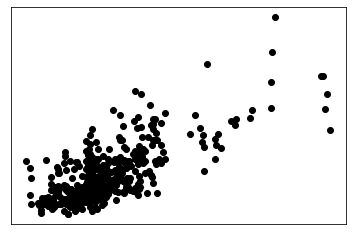

In [250]:
plt.scatter(y_next, yp, color="black")

plt.xticks(())
plt.yticks(())

plt.show()

In [251]:
from sklearn.linear_model import Lasso
las = Lasso(alpha = 1)
las.fit(X_next,y_next)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.779e+01, tolerance: 8.033e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso(alpha=1)

In [252]:
las.score(X_next,y_next)

0.4804804595757013

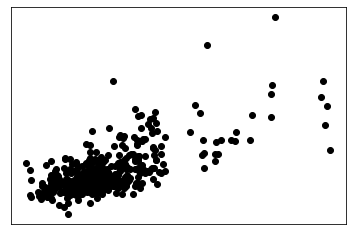

In [253]:
# Make predictions using the testing set
yp2 = las.predict(X_next)
plt.scatter(y_next, yp2, color="black")

plt.xticks(())
plt.yticks(())

plt.show()

In [254]:
from sklearn.linear_model import Ridge
rid = Ridge(alpha = 1)
rid.fit(X_next,y_next)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=1.19272e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Ridge(alpha=1)

In [255]:
rid.score(X_next,y_next)

0.5201701398085834

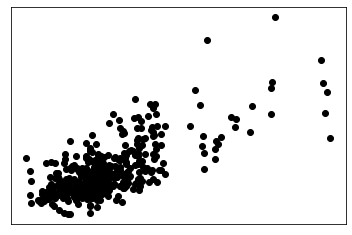

In [256]:
# Make predictions using the testing set
yp3 = rid.predict(X_next)
plt.scatter(y_next, yp3, color="black")

plt.xticks(())
plt.yticks(())

plt.show()

In [257]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
reg = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X_next, y_next)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [258]:
reg.score(X_next,y_next)

0.5420122458364329

In [259]:
yp4 = reg.predict(X_next)

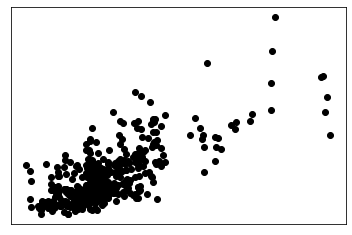

In [260]:
plt.scatter(y_next, yp4, color="black")

plt.xticks(())
plt.yticks(())

plt.show()